In [434]:
import numpy as np
import pandas as pd

In [435]:
def generate_data(num_samples = 300):
    """
    Generate random XOR data with added noise.
    """
    X = np.random.randn(num_samples, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    noise = np.random.normal(scale = 0.01, size = num_samples)
    X = np.concatenate((X, noise.reshape(-1, 1)), axis = 1)
    return X, y

In [436]:
X, y = generate_data()
y = y.astype(int)
pd.DataFrame(X).describe()

,0,1,2
count,300.000000,300.000000,300.000000
mean,-0.100797,-0.115703,-0.000107
std,1.001750,1.000350,0.010034
min,-2.522349,-2.800682,-0.030523
25%,-0.868589,-0.836440,-0.006390
50%,-0.041753,-0.047255,0.000190
75%,0.553675,0.586813,0.006057
max,2.375427,2.646860,0.030507


In [437]:
len(np.unique(y))

2

In [438]:
from sklearn.model_selection import train_test_split

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123, stratify = y)
pd.DataFrame(X_train).describe()

,0,1,2
count,225.000000,225.000000,225.000000
mean,-0.139894,-0.222359,0.000033
std,0.996764,1.008325,0.010133
min,-2.522349,-2.800682,-0.026294
25%,-0.863459,-0.909625,-0.006637
50%,-0.043619,-0.172492,0.000084
75%,0.548248,0.457412,0.006006
max,2.375427,2.632229,0.030507


In [440]:
from matplotlib import pyplot as plt

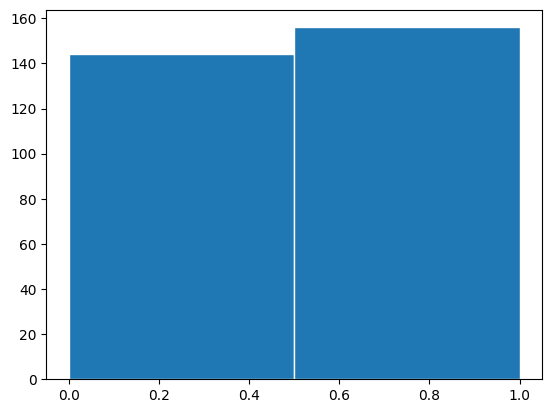

In [441]:
_ = plt.hist(y, edgecolor = 'white', bins = 2)

In [442]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [443]:
Counter(y_train) # SMOTE nije neophodan

Counter({np.int64(1): 117, np.int64(0): 108})

In [444]:
s = SMOTE(random_state = 123)

In [445]:
X_train, y_train = s.fit_resample(X_train, y_train)

In [446]:
Counter(y_train)

Counter({np.int64(1): 117, np.int64(0): 117})

In [447]:
from sklearn.preprocessing import StandardScaler

In [448]:
ss = StandardScaler()

In [449]:
ss.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [450]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
pd.DataFrame(X_train).describe()

,0,1,2
count,2.340000e+02,2.340000e+02,2.340000e+02
mean,2.372271e-17,-8.540177e-17,3.795634e-18
std,1.002144e+00,1.002144e+00,1.002144e+00
min,-2.398796e+00,-2.584317e+00,-2.631587e+00
25%,-7.243121e-01,-6.950890e-01,-6.623057e-01
50%,1.028357e-01,3.790983e-02,4.649981e-03
75%,6.966221e-01,6.649555e-01,5.892466e-01
max,2.536424e+00,2.831785e+00,3.047092e+00


In [451]:
from sklearn.svm import SVC

In [452]:
svc = SVC(kernel = 'linear')

In [453]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [454]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [455]:
pd.DataFrame(confusion_matrix(y_test, svc.predict(X_test)))

,0,1
0,11,25
1,9,30


In [456]:
accuracy_score(y_test, svc.predict(X_test))

0.5466666666666666

In [457]:
svc = SVC(kernel = 'rbf')

In [458]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [459]:
pd.DataFrame(confusion_matrix(y_test, svc.predict(X_test)))

,0,1
0,34,2
1,5,34


In [460]:
accuracy_score(y_test, svc.predict(X_test))

0.9066666666666666

In [461]:
from sklearn.decomposition import PCA

In [462]:
pca = PCA(n_components = 2)

In [463]:
pca.fit(X_train)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [464]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [465]:
pca.explained_variance_ratio_.sum()

np.float64(0.700892525468288)

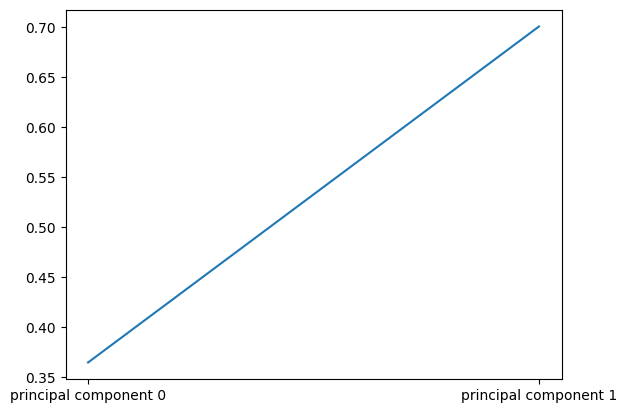

In [466]:
pca_names = [f'principal component {i}' for i in range(pca.n_components_)]
_ = plt.plot(pca_names, np.cumsum(pca.explained_variance_ratio_))

In [467]:
X = ss.fit_transform(X)
X = pca.fit_transform(X)

In [468]:
color = y_train
color[svc.support_] = 2

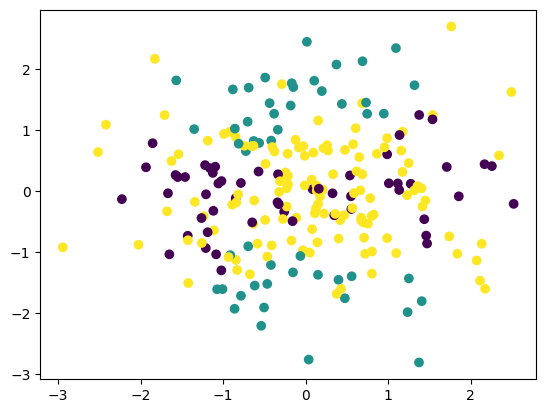

In [469]:
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c = color)
plt.show()